<a><img src="https://www.eafit.edu.co/SiteCollectionImages/logo.png" width="350" align="center"></a>
<h1 align="center"><font size="6">Trabajo 2: Preparación de texto, representación de características y representación de documentos.</font></h1>

<hr style="border:2px solid #004B85"> </hr>

# Almacenamiento y Recuperación de la Información
# Maestría en ciencia de los datos y analítica
## 8/03/2021
## Equipo
- Eliana Marcela Sierra Buriticá
- Daniel Romero Cardona
- Camilo Rivera Bedoya
- Juan David Correa Restrepo
- Jose Ignacio Escobar Bedoya

<hr style="border:2px solid #004B85"> </hr>

<h1 align="center"><font size="6">Tabla de Contenidos</font></h1>

1. [Objetivos](#objetivos)
2. [Librerias y variables iniciales](#libre)
3. [Datos](#datos)
4. [Metodologia A](#met_a)
    1. [Tokenización](#a_token)
    2. [Remoción de caracteres especiales](#a_remo_car)
    3. [Stopwords and Words](#a_stwd)
    4. [Stemming](#a_stem)
    5. [Lemmatization](#a_lemma)
    6. [Tokenización en ngrams ](#a_token_ng)
5. [Metodologia B](#met_b)
    1. [Tokenización](#b_token)
    2. [Remoción de caracteres especiales](#b_remo_car)
    3. [Stopwords](#b_stwd)
    4. [Stemming](#b_stem)
    5. [Lemmatization](#b_lemma)
    6. [Tokenización en ngrams ](#b_token_ng)
6. [Metodologia C](#met_c)
    1. [Tokenización](#c_token)
    2. [Remoción de caracteres especiales](#c_remo_car)
    3. [Stopwords](#c_stwd)
    4. [Stemming](#c_stem)
    5. [Lemmatization](#c_lemma)
    6. [Tokenización en ngrams ](#c_token_ng)
7. [Representación de características y de documentos](#repre)
    1. [Nltk](#nltk)
    2. [Scikit-Learn](#sk)
    3. [Gensim](#gensim)
    4. [pySpark](#pyspark)
    5. [Metapy](#metapy)
8. [Otros Ejemplos](#otros)
9. [Criterios de evaluación](#crit_eval)

<hr style="border:2px solid #004B85"> </hr>

<a name="objetivos"></a><hr style="border:1px solid black"> </hr>
<h1 align="center"><font size="6">1. Objetivos</font></h1>
<hr style="border:1px solid black"> </hr>

- Hallar el BoW más optimizado posible para un corpus, Realizar la representación de características y de documentos en diferentes librerías.
- Aprender y aplicar diferentes librerías para tokenización y preparación de datos, de tal manera que el estudiante sea consciente de los procesos de preparación de textos como tokenización, remoción de stopwords, remoción/reemplazo de caracteres especiales, procesos de de stemming y lemmatization.
- Aprender y aplicar diferentes técnicas de representación de características como one-bit encoding, TF, TF-IDF, BM25.
- Aprender y aplicar diferentes técnicas de representación de documentos, principalmente en Modelo de Espacio Vectorial (VSM) y opcionalmente doc2vec.
- Aprender diferentes librerías en Python para realizar preparación de texto como NLTK, Spark y META.

<a name="libre"></a><hr style="border:1px solid black"> </hr>
<h1 align="center"><font size="6">2. Librerias, Funciones y variables iniciales</font></h1>
<hr style="border:1px solid black"> </hr>

In [2]:
import pandas as pd
import numpy as np
import re
import codecs
import matplotlib
import matplotlib.pyplot as plt
import nltk
import os
from termcolor import colored
from nltk.corpus import stopwords
from nltk.corpus import words as voc_en
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
import metapy

# personalizaer matplotlib para incluir simbolos matematicos
matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)

In [3]:
def graph(tokens):
    ''' Funcion que grafica los 20 tokens mas 
        repetidos dada una lista de tokens.
        
        Parametros:
        -----------
        tokens: lista de tokens ya procesados
    '''
    fdist = nltk.FreqDist(tokens)
    topwords = fdist.most_common(20)
    print(colored('numero de palabras finales = ', 'red'),len(fdist))
    x,y = zip(*topwords)
    plt.figure(figsize=(15,4))
    plt.bar(x,y, color = "#004B85")
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('Top 20 tokens', fontsize=35)
    plt.show()
    return

In [4]:
# directorios (path) de entrada y salida:
path_in="../Datasets/"
path_out="../Output/"

<a name="datos"></a><hr style="border:1px solid black"> </hr>
<h1 align="center"><font size="6">3. Datos</font></h1>

Tomar como base el conjunto de documentos *.txt así como el archivo papers-dc.xml que se encuentran en el siguiente [Github](https://github.com/st1800eafit/st1800_20211/tree/main/datasets/papers_sample_pdf)
<hr style="border:1px solid black"> </hr>

In [5]:
#Se listan los documentos disponibles en el repositorio
files = []
i = 1
print(colored('Text files:','blue'))
for file in os.listdir(path_in):
    if file.endswith(".txt"):
        files.append(file)
        print(str(i) + '. ' + file)
        i += 1
files.append('Todos')
print(str(i) + '. Todos')

Text files:
1. 0704.3504.txt
2. 0706.1402.txt
3. 0710.0736.txt
4. 0803.2570.txt
5. 0808.0084.txt
6. 0811.1254.txt
7. 0811.2853.txt
8. 0812.2709.txt
9. Todos


In [10]:
#el usuario selecciona el documento con el que desea trabajar
file_num = 0
while file_num <= 0 or file_num > len(files):
    file_num = input('Ingrese el numero del documento con el que desea trabajar: ')
    try:
        file_num = int(file_num)
        if file_num <= 0 or file_num > len(files):
            print('Error: seleccione un numero de la lista.')
    except:
        print('Error: el valor ingresado no corresponde al formato de un numero entero.')
        file_num = 0
print(colored( 'Selecciono el documento: ', 'blue' ) + files[file_num - 1] )

Ingrese el numero del documento con el que desea trabajar: 1
Selecciono el documento: 0704.3504.txt


In [12]:
# si se selecciona un documento en específico
if files[file_num - 1] != "Todos":
    input_file = open(path_in + files[file_num - 1], "r", encoding='iso-8859-1')
    filedata = input_file.read()

<a name="met_a"></a><hr style="border:1px solid black"> </hr>
<h1 align="center"><font size="6">4. Metodologia A</font></h1>
<h1 align="center"><font size="5">Python, nltk, scikit y/o gensim</font></h1>
<hr style="border:1px solid black"> </hr>

## 4.1. Tokenización <a name="a_token"></a>

numero de palabras finales =  1014


C:\Users\Usuario\anaconda3\envs\metapy_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Usuario\anaconda3\envs\metapy_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 136 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Usuario\anaconda3\envs\metapy_env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Usuario\anaconda3\envs\metapy_env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Usuario\anaconda3\envs\metapy_env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 136 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Usuario\anaconda3\envs\metapy_env\lib\si

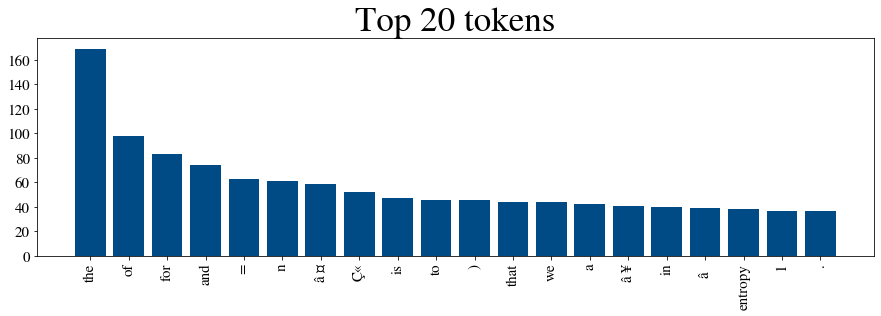

In [14]:

# Opcion 1
tokens = filedata.split()

# Opcion 2
#tokens = filedata.split(' ')

# Opcion 3
#nltk

# Graficar
graph(tokens)

## 4.2. Remoción de caracteres especiales <a name="a_remo_car"></a>
se quitan los caracteres especiales y adicionalmente se pasa todas las palabras a minusculas

numero de palabras finales =  553


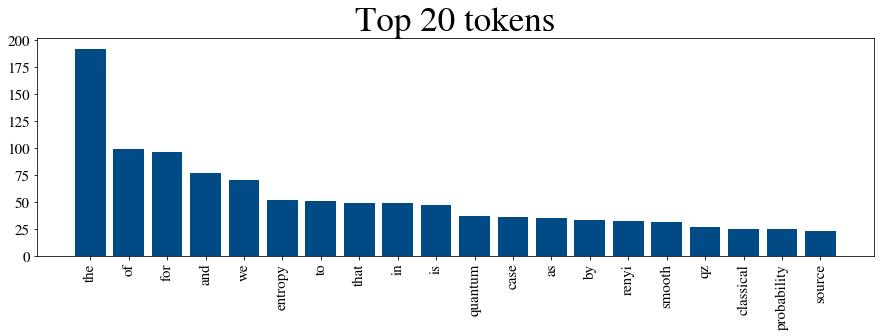

In [15]:
tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
tokens = [w.lower() for w in tokens if len(w)>1]
graph(tokens)

## 4.3. Stopwords and Words <a name="a_stwd"></a>

In [16]:
stop_words_nltk = set(stopwords.words('english'))
print(len(stop_words_nltk))

179


numero de palabras finales =  490


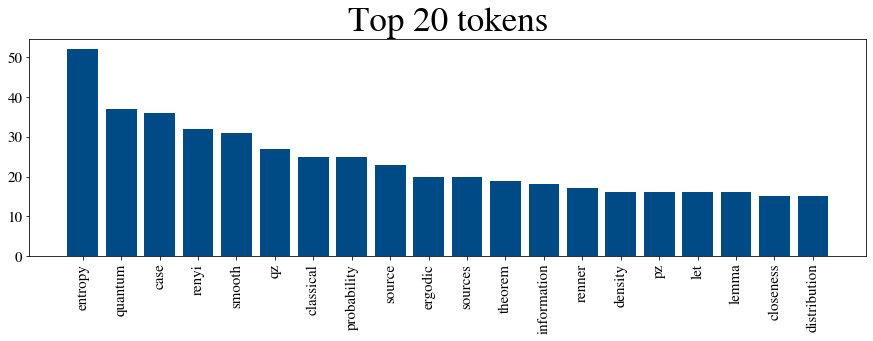

In [17]:
tokens = [w for w in tokens if w not in stop_words_nltk]
graph(tokens)

numero de palabras finales =  282


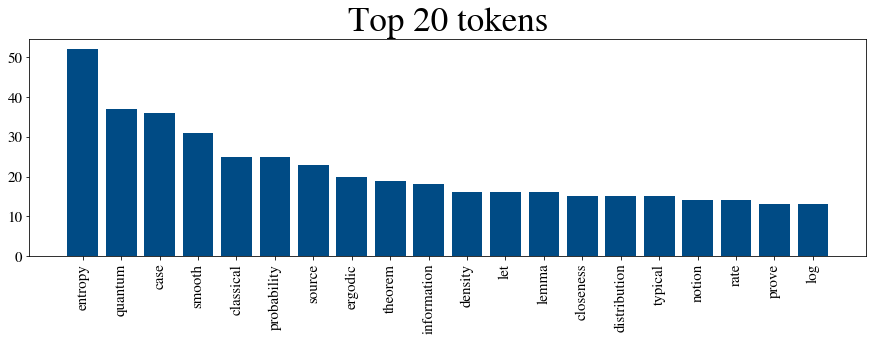

In [18]:
# solo palabras que existen en el diccionario
x = voc_en.words()
tokens = [w for w in tokens if w in x]
graph(tokens)

## 4.4. Stemming <a name="a_stem"></a>

numero de palabras finales =  244


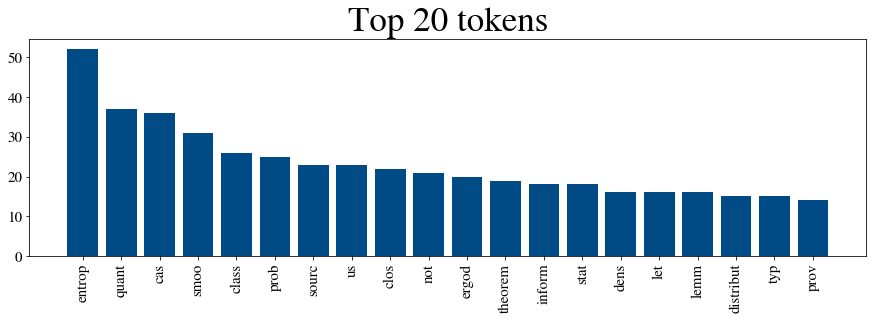

In [19]:
#se definen los dos stemmers
porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer("english")

# Opcion 1 
#tokens = [porter.stem(w) for w in tokens]

# Opcion 2
tokens = [lancaster.stem(w) for w in tokens]

# Opcion 3
#tokens = [snowball.stem(w) for w in tokens]

# Graficar
graph(tokens)

## 4.5. Lemmatization <a name="a_lemma"></a>

numero de palabras finales =  244


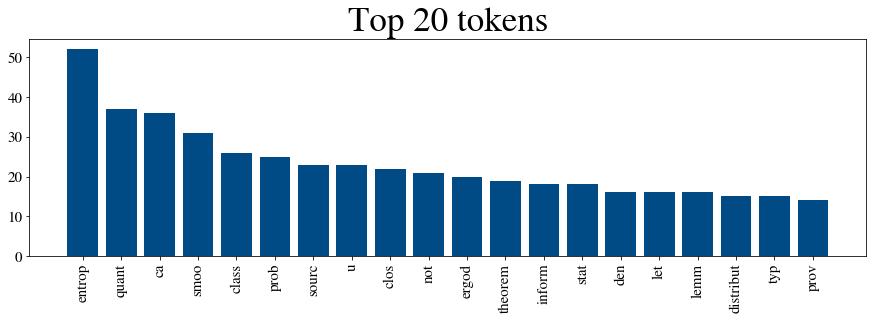

In [20]:
wordnet_lemmatizer = WordNetLemmatizer()

# probar cada una de las siguientes opciones: 
#tokens = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens ]
tokens = [wordnet_lemmatizer.lemmatize(w) for w in tokens ]
graph(tokens)

## 4.6. Tokenización en ngrams  <a name="a_token_ng"></a>

In [21]:
tokens = list(nltk.ngrams(tokens,2))
tokens

[('smoo', 'entrop'),
 ('entrop', 'ergod'),
 ('ergod', 'quant'),
 ('quant', 'inform'),
 ('inform', 'berry'),
 ('berry', 'mathem'),
 ('mathem', 'comput'),
 ('comput', 'sci'),
 ('sci', 'techn'),
 ('techn', 'univers'),
 ('univers', 'inform'),
 ('inform', 'sec'),
 ('sec', 'research'),
 ('research', 'digit'),
 ('digit', 'sign'),
 ('sign', 'research'),
 ('research', 'abstract'),
 ('abstract', 'investig'),
 ('investig', 'rec'),
 ('rec', 'not'),
 ('not', 'smoo'),
 ('smoo', 'entrop'),
 ('entrop', 'ca'),
 ('ca', 'ergod'),
 ('ergod', 'inform'),
 ('inform', 'thereby'),
 ('thereby', 'prevy'),
 ('prevy', 'work'),
 ('work', 'cont'),
 ('cont', 'main'),
 ('main', 'inform'),
 ('inform', 'act'),
 ('act', 'consid'),
 ('consid', 'ergod'),
 ('ergod', 'quant'),
 ('quant', 'inform'),
 ('inform', 'ergod'),
 ('ergod', 'class'),
 ('class', 'inform'),
 ('inform', 'spec'),
 ('spec', 'ca'),
 ('ca', 'prov'),
 ('prov', 'av'),
 ('av', 'smoo'),
 ('smoo', 'entrop'),
 ('entrop', 'rat'),
 ('rat', 'approach'),
 ('approach',

In [ ]:
tokens = list(nltk.ngrams(tokens,3))
tokens

<a name="met_b"></a><hr style="border:1px solid black"> </hr>
<h1 align="center"><font size="6">5. Metodologia B</font></h1>
<h1 align="center"><font size="5">PySpark con Spark</font></h1>
<hr style="border:1px solid black"> </hr>

## 5.1. Tokenización <a name="b_token"></a>

## 5.2. Remoción de caracteres especiales <a name="b_remo_car"></a>

## 5.3. Stopwords <a name="b_stwd"></a>

## 5.4. Stemming <a name="b_stem"></a>

## 5.5. Lemmatization <a name="b_lemma"></a>

## 5.6. Tokenización en ngrams  <a name="b_token_ng"></a>

<a name="met_c"><hr style="border:1px solid black"> </hr>
</a><h1 align="center"><font size="6">6. Metodologia C</font></h1>
<h1 align="center"><font size="5">Metapy</font></h1>
<hr style="border:1px solid black"> </hr>

## 6.1. Tokenización <a name="c_token"></a>

In [ ]:
doc = metapy.index.Document()
doc.content(filedata)

In [ ]:
tok = metapy.analyzers.ICUTokenizer(suppress_tags=True)
tok.set_content(doc.content())
tokens = [token for token in tok]

# Graficar
graph(tokens)

## 6.2. Remoción de caracteres especiales <a name="c_remo_car"></a>

In [ ]:
tok = metapy.analyzers.LengthFilter(tok, min=2, max=30)
tok.set_content(doc.content())
tokens = [token for token in tok]

# Graficar
graph(tokens)

## 6.3. Stopwords <a name="c_stwd"></a>

In [ ]:
tok = metapy.analyzers.ListFilter(tok, "lemur-stopwords.txt", metapy.analyzers.ListFilter.Type.Reject)
tok.set_content(doc.content())
tokens = [token for token in tok]

# Graficar
graph(tokens)

## 6.4. Stemming <a name="c_stem"></a>

In [ ]:
tok = metapy.analyzers.Porter2Filter(tok)
tok.set_content(doc.content())
tokens = [token for token in tok]

# Graficar
graph(tokens)

## 6.5. Tokenización en ngrams  <a name="c_token_ng"></a>

In [ ]:
tok = metapy.analyzers.ICUTokenizer(suppress_tags=True)
tok = metapy.analyzers.LowercaseFilter(tok)
tok.set_content(doc.content())
tokens = [token for token in tok]

In [ ]:
ana = metapy.analyzers.NGramWordAnalyzer(1, tok)
unigrams = ana.analyze(doc)
unigrams

In [ ]:
ana = metapy.analyzers.NGramWordAnalyzer(2, tok)
bigrams = ana.analyze(doc)
bigrams

<a name="repre"></a><hr style="border:1px solid black"> </hr>
<h1 align="center"><font size="6">7. Representación de características y de documentos</font></h1>

Investigar en cada una de las librerías diferentes opciones de representación de características como one-bit, TF, TF-IDF, BM25, word2vec, doc2vec.
<hr style="border:1px solid black"> </hr>

## 7.1. Nltk <a name="nltk"></a>

## 7.2. Scikit-Learn <a name="sk"></a>

## 7.3. Gensim <a name="gensim"></a>

## 7.4. pySpark <a name="pyspark"></a>

## 7.5. Metapy <a name="metapy"></a>

<a name="otros"></a><hr style="border:1px solid black"> </hr>
<h1 align="center"><font size="6">8. Otros Ejemplos</font></h1>
<hr style="border:1px solid black"> </hr>

Otros ejemplos y demos pueden ser encontrados en el [github de la materia](https://github.com/st1800eafit/st1800_20211.git) y muchos foros de comunidad:
- [Data Science Central](https://www.datasciencecentral.com/)
- [Towards data science](https://towardsdatascience.com/)
- [Kaggle](https://www.kaggle.com/)
- [Medium Daily Digest NLP](https://medium.com/@ODSC/an-introduction-to-natural-language-processing-nlp-8e476d9f5f59)

<a name="crit_eval"></a><hr style="border:1px solid black"> </hr>
<h1 align="center"><font size="6">9. Criterios de evaluación</font></h1>
<hr style="border:1px solid black"> </hr>

Se tendrán en cuenta los siguientes porcentajes de evaluación de cada una de las partes:

| Item | Porcentaje |
| :- | -: |
| Text Prep, Rep características y docs en Python y librerías relacionadas | 40% |
| Text Prep, Rep características y docs en PySpark con las librerías de SparkML de NLP y Text Mining | 40% |
| Text Prep, Rep características y docs en metapy | 20% |